In [1]:
import numpy as np

In [4]:
# categorical variables are divided into two types 1) nominal and 2) ordinal
# nominal don't have relationships or hierarcy order 
# but ordinal have relationships or hierarcy order 
# nominal examples are male, female
# ordinal examples are graduate,phd,masters these have hierachy order

In [5]:
# for nominal we don't use labelEncoder to change categorical variables to numeric, we use one hot encoding
# for ordinal we can use labelEncoder
# labelEncoder output is continuous, so it can generate relationships between varibles
# for example male,female,guy after labelEncoding the output is 1,2,3
# so it can generate re;ationships like 1+2=3 or 1<2<3. we already know that in nominal we don't have relationships
# so it better to use one hot encoding
# the output of one hot encoding is binary output i.e 0 or 1 , -1 or 1 like that

In [70]:
import pandas as pd
data=pd.read_csv('C:/Users/Manikanta/Machine learning/home_prices_in_canada.csv')

In [71]:
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


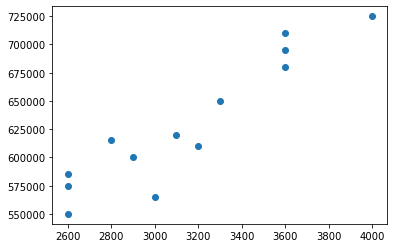

In [72]:
import matplotlib.pyplot as plt
plt.scatter(data.area,data.price)  # for regression problems

### one hot encoding using pandas

In [21]:
"""
   pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_', 
    dummy_na=False, # it is for nan values, if it true it creates separate column for nan values
    columns=None,
    drop_first=False,
    dtype=None,
)
"""

"\n   pd.get_dummies(\n    data,\n    prefix=None,\n    prefix_sep='_', \n    dummy_na=False, # it is for nan values, if it true it creates separate column for nan values\n    columns=None,\n    drop_first=False,\n    dtype=None,\n)\n"

In [22]:
data=pd.get_dummies(data,columns=["town"],prefix="Dummy",prefix_sep='@',dtype='int')
data

,area,price,Dummy@monroe township,Dummy@robinsville,Dummy@west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [24]:
data=data.drop(["Dummy@west windsor"],axis=1)

In [25]:
data

,area,price,Dummy@monroe township,Dummy@robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [27]:
x=data.drop(["price"],axis=1)
y=data.price

In [29]:
x

,area,Dummy@monroe township,Dummy@robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [30]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [28]:
model.fit(x,y)

LinearRegression()

In [31]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [32]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [34]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [35]:
model.intercept_

249790.36766292533

In [37]:
model.score(x,y)  # this score method is actually predicts values for x and the predicted values are compared with y, after that it use some formula to generate the score

0.9573929037221873

### one hot encoding using sklearn

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
df=pd.read_csv('C:/Users/Manikanta/Machine learning/home_prices_in_canada.csv')

In [54]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [55]:
dfle=df
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [56]:
x=dfle[["town","area"]]
x

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [57]:
x=dfle[["town","area"]].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [58]:
y=dfle["price"].values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [65]:
x = ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [66]:
x = x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [67]:
model.fit(x,y)

LinearRegression()

In [74]:
model.predict([[0,1,3400]])

array([681241.6684584])

In [75]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [77]:
model.score(x,y)

0.9573929037221874

### exercise

In [79]:
d=pd.read_csv('C:/Users/Manikanta/Machine learning/car_prices.csv')

In [80]:
d

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


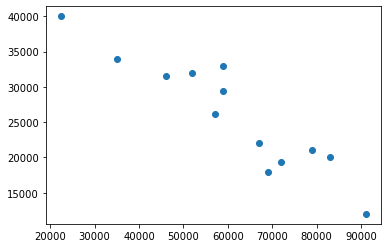

In [83]:
plt.scatter(d.Mileage,d['Sell Price($)'])

In [84]:
d.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [87]:
d['Car Model'].value_counts()  # this column is nominal data so we must apply one hot encoding only

BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: Car Model, dtype: int64

In [88]:
d.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [90]:
X=d.drop(columns=['Sell Price($)'])
Y=d['Sell Price($)']

In [91]:
X

,Car Model,Mileage,Age(yrs)
0,BMW X5,69000,6
1,BMW X5,35000,3
2,BMW X5,57000,5
3,BMW X5,22500,2
4,BMW X5,46000,4
5,Audi A5,59000,5
6,Audi A5,52000,5
7,Audi A5,72000,6
8,Audi A5,91000,8
9,Mercedez Benz C class,67000,6


In [92]:
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [96]:
"""
OneHotEncoder(
    *,
    categories='auto',
    drop=None,
    sparse=True,
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
)

"""

"\nOneHotEncoder(\n    *,\n    categories='auto',\n    drop=None,\n    sparse=True,\n    dtype=<class 'numpy.float64'>,\n    handle_unknown='error',\n)\n\n"

In [98]:
from sklearn.preprocessing import OrdinalEncoder
"""
OrdinalEncoder(
    *,
    categories='auto',
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    unknown_value=None,
)

"""

"\nOrdinalEncoder(\n    *,\n    categories='auto',\n    dtype=<class 'numpy.float64'>,\n    handle_unknown='error',\n    unknown_value=None,\n)\n\n"

In [115]:
ct=ColumnTransformer(transformers=
    [
    ("any_name",OneHotEncoder(drop="first"),["Car Model"])
    ],remainder="passthrough")

In [105]:
X_transform=ct.fit_transform(X)
X_transform

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
le=LinearRegression()
le.fit(X_transform,Y)

LinearRegression()

In [108]:
le.intercept_

56523.08523128357

In [109]:
le.coef_

array([-4.28466659e+03,  2.45354074e+03, -3.70122094e-01, -1.33245363e+03])

In [111]:
le.predict([[0,1,45000,4]])

array([36991.31721062])

In [113]:
le.predict([[1,0,86000,7]])

array([11080.74313219])

In [114]:
le.score(X_transform,Y)

0.9417050937281083